## Question

The marketing ops team sent over this spreadsheet containing four years of data from a CRM system.The team wants to find the month they're likely to contact the most clients, so they can schedule a product upgrade announcement. Which month does the team tend to contact the greatest percentage of its clients?



### Objective

To find the month that the team tends to contact the greatest percentage of its clients to allow the company to schedule a project upgrade announcement.

#### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Importing the data

In [2]:
data=pd.read_excel('DA Exercise.xlsx')
data

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25
...,...,...,...
996,Aidan Pouros,Bosco-Ortiz,2014-04-13
997,Milan Crona,Halvorson LLC,2016-09-16
998,Chauncey Dach,Franecki-Feil,2015-03-21
999,Milan Crona,Abbott Group,2017-09-27


In [3]:
data.describe()

,Account manager,Client Name,Date of Contact
count,1001,1001,1001
unique,4,35,704
top,Milan Crona,Eichmann and Sons,2013-10-11 00:00:00
freq,286,38,7
first,NaN,NaN,2013-10-03 00:00:00
last,NaN,NaN,2017-09-29 00:00:00


We can see that there are 35 unique clients in total who are managed by 4 different Account Managers.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
Account manager    1001 non-null object
Client Name        1001 non-null object
Date of Contact    1001 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.6+ KB


We can see that there is no missing data. Now, I try to make the data more readable by splitting the date into Day, Month and Year.

In [5]:
data['Date'] = data['Date of Contact'].dt.date
data['Day'] = data['Date of Contact'].dt.day
data['Month'] = data['Date of Contact'].dt.month
data['Year'] = data['Date of Contact'].dt.year
data

,Account manager,Client Name,Date of Contact,Date,Day,Month,Year
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015-10-31,31,10,2015
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013-12-15,15,12,2013
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013-12-07,7,12,2013
3,Milan Crona,Armstrong Group,2013-11-02,2013-11-02,2,11,2013
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013-12-25,25,12,2013
...,...,...,...,...,...,...,...
996,Aidan Pouros,Bosco-Ortiz,2014-04-13,2014-04-13,13,4,2014
997,Milan Crona,Halvorson LLC,2016-09-16,2016-09-16,16,9,2016
998,Chauncey Dach,Franecki-Feil,2015-03-21,2015-03-21,21,3,2015
999,Milan Crona,Abbott Group,2017-09-27,2017-09-27,27,9,2017


Now, I try to find the different clients contacted in each month.

In [6]:
d1 = data.groupby(['Month'])['Client Name'].unique()
d1

Month
1     [Anderson, Kutch and Hyatt, Franecki-Feil, Mit...
2     [Walter Inc, Donnelly-Champlin, Hoppe-Batz, Ab...
3     [Abbott Group, Armstrong Group, Veum, McClure ...
4     [Fahey, Wunsch and Bashirian, Wyman, Farrell a...
5     [Fahey, Wunsch and Bashirian, Sanford and Sons...
6     [Brown, Wyman and Grimes, Hauck Group, Medhurs...
7     [Bosco-Ortiz, Kris, Shanahan and Quigley, Hage...
8     [Hauck Group, Denesik, Stehr and Carter, Armst...
9     [Stamm-Crooks, Denesik, Stehr and Carter, John...
10    [Wyman, Farrell and Haag, Oga, Gottlieb and Cr...
11    [Armstrong Group, Mitchell and Sons, Johnston-...
12    [Veum, McClure and Schuster, Lueilwitz, Moore ...
Name: Client Name, dtype: object

These are the clients who were contacted in these respective months. Now , I try to find the number of times the clients were contacted in each month.

In [7]:
d2 = data.groupby(['Month'])['Client Name'].count()
d2


Month
1      60
2      64
3      58
4      52
5      69
6      77
7      66
8      79
9     121
10    213
11     65
12     77
Name: Client Name, dtype: int64

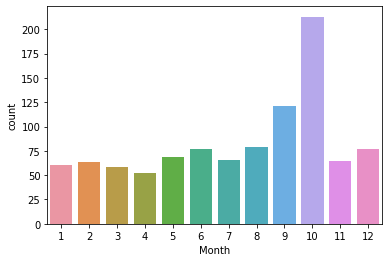

In [8]:
sns.countplot(x="Month", data=data)


We can see that the most number of clients were contacted in the month of October. However, we want to be sure on if the number of clients contacted in that month cover most percentage of clients of the company. So we check the number of unique clients contacted in each month.

In [10]:
d4 = data.groupby('Month')[('Client Name')].nunique().reset_index(name='Unique Client').sort_values(['Unique Client'], ascending=False)
    
d4

,Month,Unique Client
9,10,35
5,6,34
4,5,33
7,8,33
8,9,33
11,12,32
1,2,31
0,1,30
10,11,30
2,3,29


We know that there are 35 unique clients and we can see that in the month of October, 35 unique clients have been contacted during those 4 years. We donot have enough data and so we donot know the details on when each of these clients joined or if they are still clients but we know that all the clients have been contacted in the month of October which is basicall 100% of the company's clients.

Hence, the team tends to contact the greatest percentage of its clients in the month of October and the company should schedule a project upgrade announcement accordingly.